План анализа данных
1. Определение целей и изучение общей информации
    - Знакомство с данными
    
    
2. Предобработка данных
    - Аббревиатура 'tbd'
    - Преобразование данных в нужные типы
    - Обработка пропусков
    
    - Добавление  столбца с суммарными продажами
    
    
3. Исследовательский анализ данных
    - Подсчет выпуска игр по годам
    - Изменения продаж в разрезе платформ
    - Определение наиболее прибыльных платформ
    - Построение диаграммы размаха по глобальным продажам игр
    - Построение диаграммы рассеяния отзывов и продаж
    - Разбор игр по жанрам
    
    
4. Портрет пользователя для каждого региона
    - Топ-5 по платформам
    - Топ-5 по жанрам
    - Рейтинг ESRB и его влияние на продажи 
    
    
5. Проверка гипотез
    - Определение гипотез: Формулировка нулевой и альтернативной гипотезы
    - Проведение тестов: Расчет p-значений и интерпретация результатов
    - Интерпретация результатов
    
    
6. Общий вывод на основе полученных данных

#### Определение целей и изучение информации

Цель проекта: определить какие закономерности влияют на успешность игры. На основании них будет выбран потенциально популярный продукт к которому будут применяться рекламные компании.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('/datasets/games.csv')
data.info()
data.head(15)

<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 16715 entries, 0 to 16714
,Data columns (total 11 columns):
, #   Column           Non-Null Count  Dtype  
,---  ------           --------------  -----  
, 0   Name             16713 non-null  object 
, 1   Platform         16715 non-null  object 
, 2   Year_of_Release  16446 non-null  float64
, 3   Genre            16713 non-null  object 
, 4   NA_sales         16715 non-null  float64
, 5   EU_sales         16715 non-null  float64
, 6   JP_sales         16715 non-null  float64
, 7   Other_sales      16715 non-null  float64
, 8   Critic_Score     8137 non-null   float64
, 9   User_Score       10014 non-null  object 
, 10  Rating           9949 non-null   object 
,dtypes: float64(6), object(5)
,memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
shape_before = data.shape # Вызовем метод shape для подсчета строк/столбцов таблицы.
print()
print(shape_before)


,(16715, 11)


In [4]:
min_date = data['Year_of_Release'].min()
max_date = data['Year_of_Release'].max()
print(f"Данные охватывают период с {min_date} по {max_date} год.")

Данные охватывают период с 1980.0 по 2016.0 год.


После изучения данных можно определить, что таблица содержит информацию о проданных компьютерных играх с оценками пользователей и экспертов, их жанр и платформа.
В столбцах встречаются значения NaN, названия столбцов с заглавных букв.

#### Предобработка данных

##### Аббревиатура 'tbd'

Столбец User_Score — оценка пользователей тоже следует преобразовать в числовой тип, но не дает значение 'tbd' в некоторых строках. Данное обозначение расшифровывается как To Be Determined, то есть "Будет определено". Такие обозначения следует заменить на цифру, не попадающую в возможную оценку пользователей (от 0 до 10).

In [5]:
# Методом replace() заменим tbd на пустую строку. 
data.loc[:, 'User_Score'] = data['User_Score'].replace('tbd', '-1')

##### Преобразование данных в нужные типы
Задача этого шага привести данные к возможности дальше их анализировать.
Для начала преобразуем данные в нужные типы и приведем названия к нижнему регистру

In [6]:
# Приведем названия всех столбцов к нижнему регистру с помощью спискового включения.
data.columns = data.columns.str.lower()

In [7]:
# Преобразуем в числовые значения.
data.loc[:, 'user_score'] = pd.to_numeric(data['user_score'])
data.loc[:, 'critic_score'] = pd.to_numeric(data['critic_score'])

##### Обработка пропусков

In [8]:
# Методом isna() найдем пропуски датафрейма.
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [9]:
# Заменим методом fillna() пропуски на значения, не входящие в оценку. 
data['critic_score'] = data['critic_score'].fillna(-1)
data['user_score'] = data['user_score'].fillna(-1)

In [10]:
# Удалим пробелы вначале и в конце значений.
data['name'] = data['name'].replace(' ', '', regex=True)

In [11]:
# Удалим пропуски в столбцах с названиями игр, жанра и год выпуска.
data = data.dropna(subset=['name', 'genre', 'year_of_release']) 
# Заменим методом fillna() пропуски на unknown.
data.loc[:, 'rating'] = data['rating'].fillna('unknown')

In [12]:
# Метод duplicated найдет дубликаты. 
data.duplicated().sum()

0

In [13]:
dup_rows = data[data.duplicated(['name', 'platform', 'year_of_release'], keep=False)]
dup_rows

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,MaddenNFL13,PS3,2012.0,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16230,MaddenNFL13,PS3,2012.0,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


При поиске неявных дубликатов нашлось одно совпадение. Удалим нижнюю строку, т.к. в ней меньше данных.

In [14]:
# Удалим строку методом drop().
data = data.drop(index=16230)

Возможная причина пропусков в столбцах оценок критиков и пользователей - в интернет-магазине, что предоставил данные, данную игру не оценили. Пропуски в столбце рейтинга ERSB связаны с тем, что этот рейтинг для США и Канады, у нас же игры и с других континентов.

##### Добавление  столбца с суммарными продажами

In [15]:
# Методом sum() сложим строки трех 4-х регионов. 
data.loc[:, 'total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

Важно посмотреть, какая доля от изначального количества данных осталась после фильтрации. Ранее мы вызывали этот метод на шаге "Изучение общей информации и определение целей исследования". 

In [16]:
shape_after = data.shape # Повторно вызовем метод shape.
print(shape_before, shape_after)

(16715, 11) (16443, 12)


Мы можем провести актуальный анализ, т.к. у нас есть не менее 90 % от изначального числа данных.

In [17]:
# Посмотрим, что осталось
temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
,Int64Index: 16443 entries, 0 to 16714
,Data columns (total 12 columns):
, #   Column           Non-Null Count  Dtype  
,---  ------           --------------  -----  
, 0   name             16443 non-null  object 
, 1   platform         16443 non-null  object 
, 2   year_of_release  16443 non-null  float64
, 3   genre            16443 non-null  object 
, 4   na_sales         16443 non-null  float64
, 5   eu_sales         16443 non-null  float64
, 6   jp_sales         16443 non-null  float64
, 7   other_sales      16443 non-null  float64
, 8   critic_score     16443 non-null  float64
, 9   user_score       16443 non-null  float64
, 10  rating           16443 non-null  object 
, 11  total_sales      16443 non-null  float64
,dtypes: float64(8), object(4)
,memory usage: 1.6+ MB
,None
,-------------------------
,name ["'98Koshien" '.hack//G.U.Vol.1//Rebirth' '.hack//G.U.Vol.2//Reminisce'
, ... 'uDrawStudio' 'uDrawStudio:InstantArtist' '¡ShinChanFlipaenc

Вывод по проведенному анализу и обработке данных. Был удален один неявный дубликат, который нашелся одновременно по трем столбцам: название игры, дата выпуска и платформа. Пропуски в столбцах с оценками критиков и пользователей заменили на число не входящее в шкалу оценок. В столбце с рейтингом ESRB заменили пропуски на значение unknown. Добавлен столбец с суммарными продажами по каждой игре в отдельности. 

#### Исследовательский анализ данных

##### Подсчет выпуска игр по годам

In [18]:
# Создадим сводную таблицу по количеству выпущенных игр за каждый год.  
pivot = pd.pivot_table(data, values='name', index='year_of_release', aggfunc='count')
pivot.sort_values('name', ascending=False, inplace=True) # Сортируем по убыванию.
pivot.rename(columns={'name': 'кол-во игр'}, inplace=True)
pivot

,кол-во игр
year_of_release,
2008.0,1427
2009.0,1426
2010.0,1255
2007.0,1197
2011.0,1136
2006.0,1006
2005.0,939
2002.0,829
2003.0,775


В 80-е игр выпускалось мало, что логично, тогда только начиналась эпоха компьютера и компьютерных игр. Компьютерные игры - это быстроменяющийся мир, поэтому на такие года в дальнейшем анализе не опираемся.  Посмотрим дальше на платформы, на которых выпускаются эти игры.

##### Изменения продаж в разрезе платформ

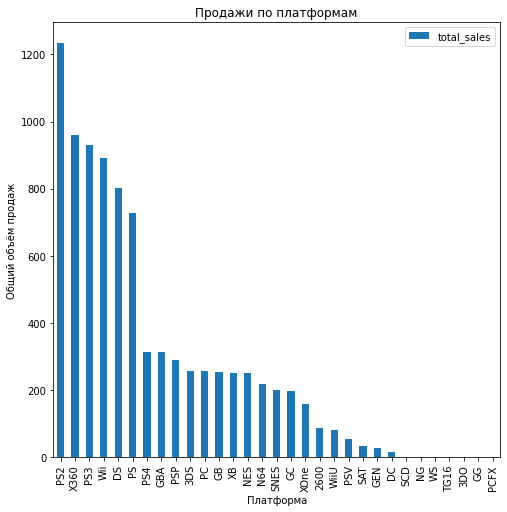

In [19]:
# Посчитаем сколько за каждый год в разрезе платформ было продано игр.
pivot_platform = pd.pivot_table(data, values='total_sales', index=['platform', 'year_of_release'], aggfunc='sum')

# Теперь тоже самое, но года по платформам все сложим.
grouped = data.groupby(['platform'])['total_sales'].sum().reset_index()
grouped = grouped.sort_values(by='total_sales', ascending=False) # Сортируем по убыванию.
grouped.plot(x='platform', y='total_sales', kind='bar', figsize=(8, 8))
plt.title('Продажи по платформам')
plt.xlabel('Платформа')
plt.ylabel('Общий объём продаж')
plt.show()

Самые прибыльные оказались платформы PS2, X360, PS3, Wii, DS и PS. На них посмотрим в разрезе.

In [20]:
# Методом query() оставим только самые прибыльные.
grouped = pivot_platform.query("platform in ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'] and total_sales > 100")

Посмотрим наглядно на шесть самых прибыльных платформ

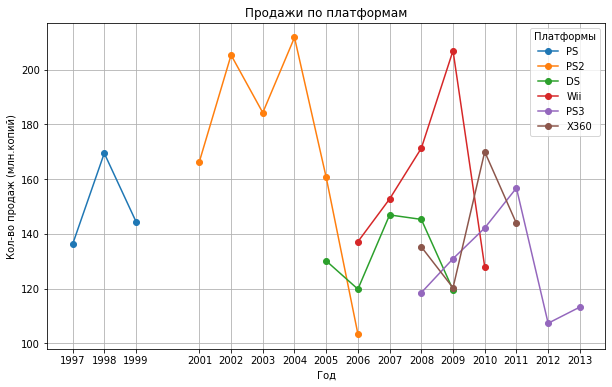

In [21]:
# Группируем данные по году выпуска и платформам, а затем суммируем значения общих продаж.
grouped = grouped.groupby(['year_of_release', 'platform'])['total_sales'].sum().reset_index()

plt.figure(figsize=(10, 6))

# Применим цикл, чтобы отрисовать линии для каждой платформы.
for platform in grouped['platform'].unique():
    platform_data = grouped[grouped['platform'] == platform]
    plt.plot(platform_data['year_of_release'], platform_data['total_sales'], marker='o', label=platform)

plt.title('Продажи по платформам')
plt.xlabel('Год')
plt.ylabel('Кол-во продаж (млн.копий)')
plt.xticks(grouped['year_of_release'].unique())  # Установим метки по оси X.
plt.legend(title='Платформы')
plt.grid()

Возьмем только тот период, где продажи платформ начали расти. Найдем медианное значение. 

In [22]:
result = grouped.query('total_sales > 100')
temp = result
time_life = temp.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 
time_life['life'].median()

5.0

Медианное значение показало срок жизни платформ 5 лет. 
    <br> В мире Нинтендо при появлении  платформы Wii в 2006 году, уже действующая платформа DS вначале снизилась в своих показателях, а потом на два года все же нашла своих кумиров. У Wii быстро росла популярность, но так же стремительно и упала. PS и PS2 для игровой приставки PlayStation были лидерами до 2005 года лидерами. 
<br> На основании этого графика и вычислений жизни платформ, чтобы спрогнозировать стратегию на 2017 год возьмем четырехлетку ближе к текущему времени - период 2012-2016 гг, который и будем дальше анализировать.

##### Определение наиболее прибыльных платформ

In [24]:
# Создаем новый фрейм оставив только интересующие нам года.
mask = (data['year_of_release'] >= 2012)
# Назовем его data_new.
data_new = data[mask]
data_new

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,GrandTheftAutoV,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,GrandTheftAutoV,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,CallofDuty:BlackOps3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,unknown,14.63
33,PokemonX/PokemonY,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,unknown,14.60
34,CallofDuty:BlackOpsII,PS3,2012.0,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,StrawberryNauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,unknown,0.01
16707,AiyokunoEustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,-1.0,-1.0,unknown,0.01
16710,SamuraiWarriors:SanadaMaru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,unknown,0.01
16712,HaitakanoPsychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,unknown,0.01


Сделаем подсчет за 2012-2016 гг суммы продаж в разрезе платформ, на которых на тот период продавались игры, и за какие года. 

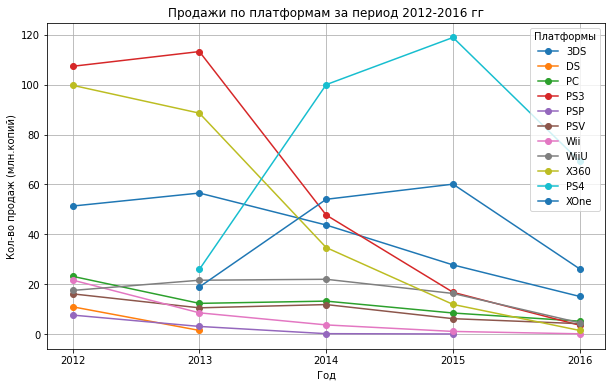

In [25]:
# Выберем только три столбца для наблюдений.
new_platform = data_new[['platform', 'total_sales', 'year_of_release']]

# Группируем данные по году выпуска и платформам, а затем суммируем значения общих продаж.
group_platform = new_platform.groupby(['year_of_release', 'platform'])['total_sales'].sum().reset_index()

plt.figure(figsize=(10, 6))

# Применим цикл, чтобы отрисовать линии для каждой платформы.
for platform in group_platform['platform'].unique():
    dates = group_platform[group_platform['platform'] == platform]
    plt.plot(dates['year_of_release'], dates['total_sales'], marker='o', label=platform)

plt.title('Продажи по платформам за период 2012-2016 гг')
plt.xlabel('Год')
plt.ylabel('Кол-во продаж (млн.копий)')
plt.xticks(group_platform['year_of_release'].unique())  # Установим метки по оси X
plt.legend(title='Платформы')
plt.grid()

2016 год не полный, поэтому в графике не учитываем спад, который наблюдается у всех платформ.
За период 2012-2015 гг лидируют PS3 и PS4 платформы. Падение наблюдается у: PS3, X360, 3DS. Рост у PS4 и XOne. Потенциально прибыльными платформами являются PS4, XOne и WiiU. Хоть у WiiU доход и значительно меньше, но она не "прыгает" в своих показателях и является более прибыльной среди остальных стабильных платформ. 

##### Построение диаграммы размаха по глобальным продажам игр

Найдем глобальные продажи игр в разбивке по платформам.

In [26]:
# Группируем по каждой платформе сумму продаж.
boxplot_platform = data_new.groupby(['platform'])['total_sales'].sum().reset_index()
boxplot_platform = boxplot_platform.sort_values(by='total_sales', ascending=False)
boxplot_platform

,platform,total_sales
4,PS4,314.14
3,PS3,288.78
9,X360,236.54
0,3DS,194.61
10,XOne,159.32
8,WiiU,82.19
2,PC,62.65
6,PSV,49.18
7,Wii,35.37
1,DS,12.55


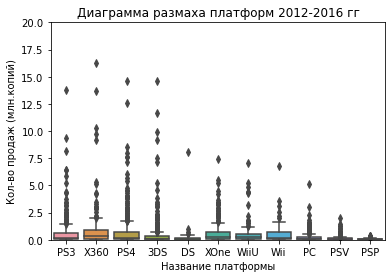

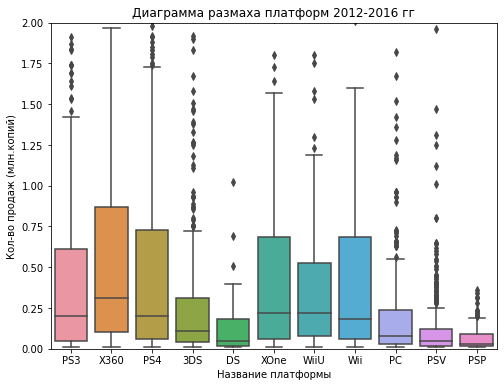

In [27]:
#group_platform = data_new.query("platform in ['PS4', 'PS3', 'X360', 'XOne', '3DS', 'WiiU']")
sns.boxplot(x='platform', y='total_sales', data=data_new)
plt.title('Диаграмма размаха платформ 2012-2016 гг')
plt.xlabel('Название платформы')
plt.ylabel('Кол-во продаж (млн.копий)')
plt.ylim(0, 20)
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='platform', y='total_sales', data=data_new)
plt.title('Диаграмма размаха платформ 2012-2016 гг')
plt.xlabel('Название платформы')
plt.ylabel('Кол-во продаж (млн.копий)')
plt.ylim(0, 2)
plt.show()

На диаграмме размаха лидирует платформа X360, затем Wii и PS4. 
То есть перспективные платформы выделим PS4, X360, XOne, Wii, WiiU и PS3.

##### Построение диаграммы рассеяния отзывов и продаж

Самой популярной является PS4 платформа - она в тройке лидеров и за период 2013-2015 гг. ее популярность росла. Выберем по этой платформе оценки игр от критиков и пользователей, также нам понадобятся общие продажи. 

In [29]:
# Исключим методом query() заглушку из столбца 'critic_score'.
data_original = data_new.copy()
data_critic = data_new.query("not (critic_score == -1)")
# Отфильтруем только платформу PS4. 
new_table = data_critic[data_critic['platform'] == 'PS4'][['critic_score', 'total_sales']]
new_table

,critic_score,total_sales
42,97.0,12.62
77,82.0,8.58
92,83.0,7.66
94,85.0,7.60
105,87.0,7.17
...,...,...
16486,42.0,0.01
16499,70.0,0.01
16500,69.0,0.01
16526,61.0,0.01


Коэффициент корреляции продаж от оценки критиков: 0.40656790206178095


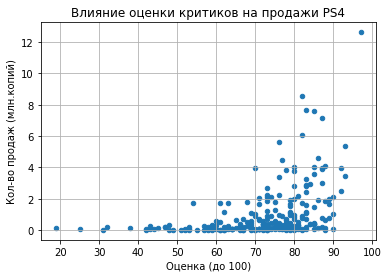

In [30]:
# Строим диаграмму рассеяния.
new_table.plot(x='critic_score', y='total_sales', kind='scatter', grid=True)
plt.title('Влияние оценки критиков на продажи PS4')
plt.xlabel('Оценка (до 100)')
plt.ylabel('Кол-во продаж (млн.копий)')
print('Коэффициент корреляции продаж от оценки критиков:', new_table['critic_score'].corr(new_table['total_sales']))

Продажи от отзывов критиков влияют слабо, тому подтверждение коэффициент корреляции, который равен 0.4. На высоких оценках диаграмма показывает небольшое влияние оценки на продажу. 

In [31]:
# Исключим методом query() заглушку из столбца 'user_score'.
data_original = data_new.copy()
data_user = data_new.query("not (user_score == -1)")
new_table_1 = data_user[data_user['platform'] == 'PS4'][['user_score', 'total_sales']]
new_table_1

,user_score,total_sales
42,8.3,12.62
77,4.3,8.58
92,5.7,7.66
94,5.0,7.60
105,6.5,7.17
...,...,...
16486,2.3,0.01
16499,6.8,0.01
16500,7.5,0.01
16526,7.9,0.01


Коэффициент корреляции продаж от оценки пользователей: -0.031957110204556376


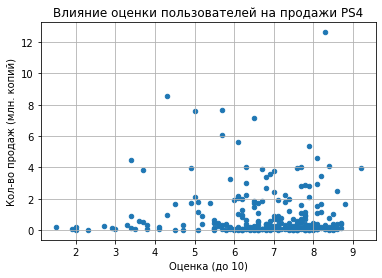

In [32]:
# Строим диаграмму рассеяния.
new_table_1.plot(x='user_score', y='total_sales', kind='scatter', grid=True)
plt.title('Влияние оценки пользователей на продажи PS4')
plt.xlabel('Оценка (до 10)')
plt.ylabel('Кол-во продаж (млн. копий)')
print('Коэффициент корреляции продаж от оценки пользователей:', new_table_1['user_score'].corr(new_table_1['total_sales']))

А вот оценки пользователей не влияют на продажи в выбранной платформе. Коэффициент корреляции -0.03 говорит о полном отсутствии зависимости. 

ЗАВИСИМОСТЬ ОСТАЛЬНЫХ ПЛАТФОРМ

Влияние оценок критиков и пользователей на продажи игр платформы X360

In [33]:
new_table = data_critic[data_critic['platform'] == 'X360'][['critic_score', 'total_sales']]
new_table_1 = data_user[data_user['platform'] == 'X360'][['user_score', 'total_sales']]

Коэффициент корреляции продаж от оценки критиков: 0.3605734888507336
,Коэффициент корреляции продаж от оценки пользователей: 0.006163978646213326


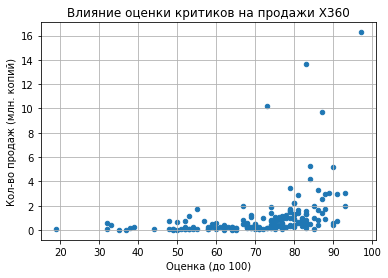

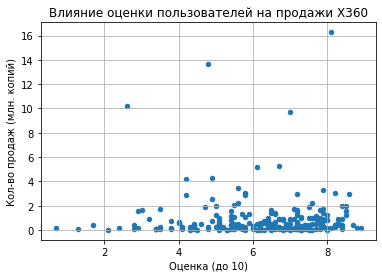

In [34]:
# Строим диаграмму рассеяния.
new_table.plot(x='critic_score', y='total_sales', kind='scatter', grid=True)
plt.title('Влияние оценки критиков на продажи X360')
plt.xlabel('Оценка (до 100)')
plt.ylabel('Кол-во продаж (млн. копий)')

print('Коэффициент корреляции продаж от оценки критиков:', new_table['critic_score'].corr(new_table['total_sales']))

new_table_1.plot(x='user_score', y='total_sales', kind='scatter', grid=True)
plt.title('Влияние оценки пользователей на продажи X360')
plt.xlabel('Оценка (до 10)')
plt.ylabel('Кол-во продаж (млн. копий)')
print('Коэффициент корреляции продаж от оценки пользователей:', new_table_1['user_score'].corr(new_table_1['total_sales']))

Влияние оценки критиков на продажи слабое, пользователей - очень слабое.

Влияние оценок критиков и пользователей на продаже игр платформы XOne.

In [35]:
new_table = data_critic[data_critic['platform'] == 'XOne'][['critic_score', 'total_sales']]
new_table_1 = data_user[data_user['platform'] == 'XOne'][['user_score', 'total_sales']]

Коэффициент корреляции продаж от оценки критиков: 0.4169983280084017
,Коэффициент корреляции продаж от оценки пользователей: -0.06892505328279414


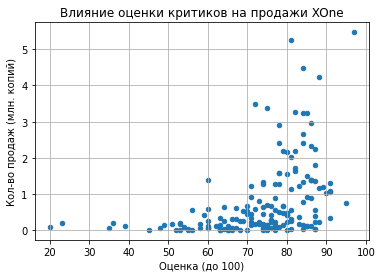

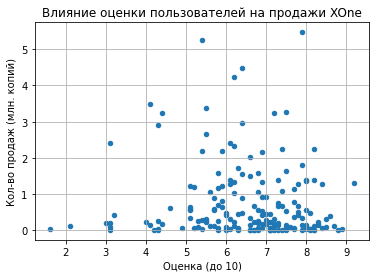

In [36]:
# Строим диаграмму рассеяния.
new_table.plot(x='critic_score', y='total_sales', kind='scatter', grid=True)
plt.title('Влияние оценки критиков на продажи XOne')
plt.xlabel('Оценка (до 100)')
plt.ylabel('Кол-во продаж (млн. копий)')

print('Коэффициент корреляции продаж от оценки критиков:', new_table['critic_score'].corr(new_table['total_sales']))

new_table_1.plot(x='user_score', y='total_sales', kind='scatter', grid=True)
plt.title('Влияние оценки пользователей на продажи XOne')
plt.xlabel('Оценка (до 10)')
plt.ylabel('Кол-во продаж (млн. копий)')
print('Коэффициент корреляции продаж от оценки пользователей:', new_table_1['user_score'].corr(new_table_1['total_sales']))

Как в случае с платформой PS4: влияние оценки критиков - слабое, влияние пользователей - отсутствует.

Влияние оценок критиков и пользователей на продаже игр платформы WiiU.

Коэффициент корреляции продаж от оценки критиков: 0.34837976012017485
,Коэффициент корреляции продаж от оценки пользователей: 0.4002190202148617


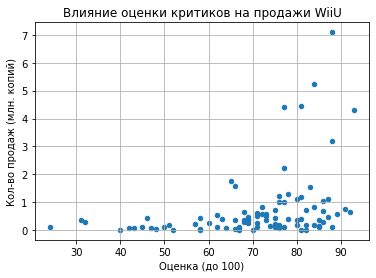

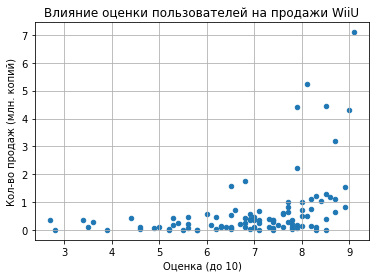

In [37]:
new_table = data_critic[data_critic['platform'] == 'WiiU'][['critic_score', 'total_sales']]
new_table_1 = data_user[data_user['platform'] == 'WiiU'][['user_score', 'total_sales']]
# Строим диаграмму рассеяния.
new_table.plot(x='critic_score', y='total_sales', kind='scatter', grid=True)
plt.title('Влияние оценки критиков на продажи WiiU')
plt.xlabel('Оценка (до 100)')
plt.ylabel('Кол-во продаж (млн. копий)')

print('Коэффициент корреляции продаж от оценки критиков:', new_table['critic_score'].corr(new_table['total_sales']))

new_table_1.plot(x='user_score', y='total_sales', kind='scatter', grid=True)
plt.title('Влияние оценки пользователей на продажи WiiU')
plt.xlabel('Оценка (до 10)')
plt.ylabel('Кол-во продаж (млн. копий)')
print('Коэффициент корреляции продаж от оценки пользователей:', new_table_1['user_score'].corr(new_table_1['total_sales']))

Оценки критиков и пользователей влияют слабо. 

Подведем итог. Корреляция показала слабое влияние оценок критиков и пользователей на продажи. А на платформах PS4 и XOne влияние оценок пользователей даже действовало противоположно друг другу, но в очень слабой степени - чем ниже оценка, тем выше продажи.

##### Разбор игр по жанрам

Посмотрим на общее распределение игр по жанрам и найдем самый прибыльный. 

In [39]:
# Строим сводную таблицу методом groupby() с жанрами, названиями и общими продажами.
data_genre = data_new.groupby('genre').agg({'name': 'count', 'total_sales': 'sum'}).reset_index()
data_genre = data_genre.sort_values(by='name', ascending=False)
data_genre

,genre,name,total_sales
0,Action,1031,441.12
7,Role-Playing,370,192.80
1,Adventure,302,29.43
10,Sports,267,181.06
8,Shooter,235,304.73
3,Misc,192,85.04
6,Racing,115,53.50
2,Fighting,109,44.49
4,Platform,85,61.00
9,Simulation,80,35.12


На основании сводной таблицы видно, что вышедших игр в жанре Action значительно больше любых других - 1031 игра, но стоимость одной игры невысока. Такие игры берут количеством - всего продано 441 млн. копий. Самые низкие продажи у жанра Puzzle и Strategy.<br> Добавим значения, которые покажут соотношение продаж к количеству игр в данном жанре.  

In [40]:
data_genre['fraction'] = data_genre['total_sales'] / data_genre['name'] 
data_genre = data_genre.sort_values(by='fraction', ascending=False)
data_genre

,genre,name,total_sales,fraction
8,Shooter,235,304.73,1.296723
4,Platform,85,61.00,0.717647
10,Sports,267,181.06,0.678127
7,Role-Playing,370,192.80,0.521081
6,Racing,115,53.50,0.465217
3,Misc,192,85.04,0.442917
9,Simulation,80,35.12,0.439000
0,Action,1031,441.12,0.427856
2,Fighting,109,44.49,0.408165
11,Strategy,71,13.34,0.187887


Доля показала, что одна игра жанра Shooter стоит дороже остальных, а Adventure дешевле всего. Самые дорогие игры жанра Shooter - 1.29 стоимость одной игры, самые дешевые - Adventure - 0.09. За период 2012-2016 гг жанр Shooter принес достаточно дохода в сравнении с другими жанрами - 304 млн. проданных копий. 
    <br> Посмотрим на медианные значения построив диаграмму размаха, которая покажет какой жанр приносит доход не зависимо от платформы. Делаем это потому, что одна игра выпускается для разных платформ и на одной платформе она может быть популярна, а на другой нет, а максимум общих продаж все равно отобразится.

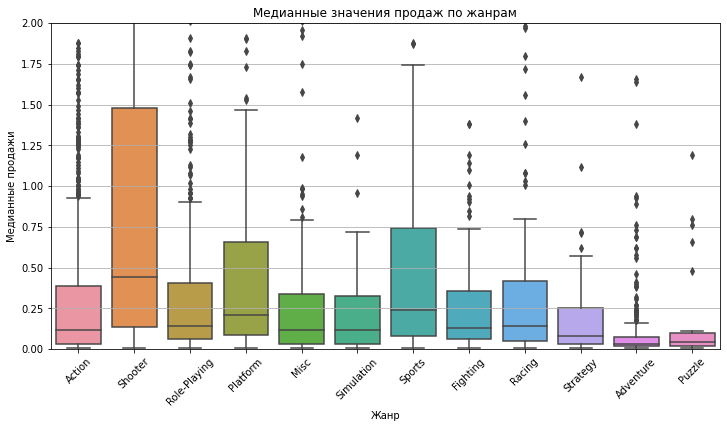

In [41]:
# Построим диаграмму размаха. 
plt.figure(figsize=(12, 6))
sns.boxplot(x='genre', y='total_sales', data=data_new)
plt.title('Медианные значения продаж по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Медианные продажи')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.ylim(0,2)
plt.show()

Медианные значения показали, что у жанра Shooter хорошие показатели, дальше по показателям доходности жанр Sports. Медианное значение меньше всего у жанра Adventure. А вот у жанра Action медиана невысокая. 
<br> Выделяем два жанра по доходности - Action и Shooter. 

#### Портрет пользователя для каждого региона

##### Топ-5 по платформам

Найдем ТОП-5 платформ в Америке, Европе и Японии по прибыльности. Для наглядности строим диаграммы по каждому региону

In [42]:
result = data_new.groupby(['platform'])['eu_sales', 'na_sales', 'jp_sales'].sum().reset_index()
result = result.sort_values(by='eu_sales', ascending=False)

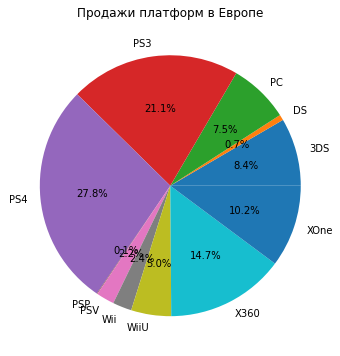

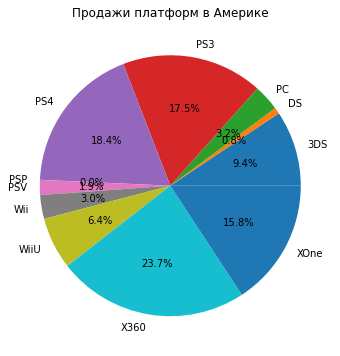

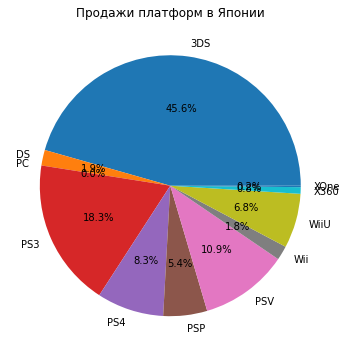

In [43]:
# Построим круговые диаграммы. 
grouped = result.groupby('platform')

eu_sales = grouped['eu_sales'].sum().reset_index()
plt.figure(figsize=(6, 6))
plt.pie(eu_sales['eu_sales'], labels=eu_sales['platform'], autopct='%1.1f%%')
plt.title('Продажи платформ в Европе')
plt.show()

na_sales = grouped['na_sales'].sum().reset_index()
plt.figure(figsize=(6, 6))
plt.pie(na_sales['na_sales'], labels=na_sales['platform'], autopct='%1.1f%%')
plt.title('Продажи платформ в Америке')
plt.show()

jp_sales = grouped['jp_sales'].sum().reset_index()
plt.figure(figsize=(6, 6))
plt.pie(jp_sales['jp_sales'], labels=jp_sales['platform'], autopct='%1.1f%%')
plt.title('Продажи платформ в Японии')
plt.show()


В Европе ТОП-5 платформ: PS4, PS3, X360, XOne и 3DS. 
<br> В Америке X360, PS4, PS3, XOne и 3DS. 
<br> В Японии 3DS, PS3, PSV, PS4 и WiiU. 

##### Топ-5 по жанрам

In [44]:
genre = data_new.groupby(['genre'])['eu_sales', 'na_sales', 'jp_sales'].sum().reset_index()
genre = genre.sort_values(by='eu_sales', ascending=False)

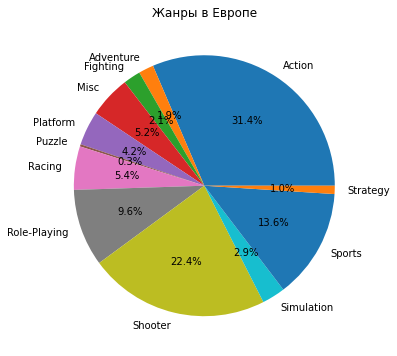

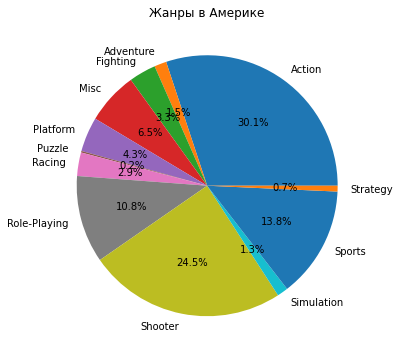

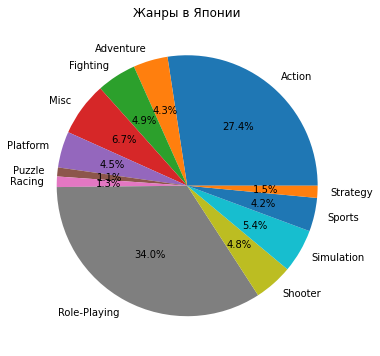

In [45]:
# Построим круговые диаграммы. 
groups = genre.groupby('genre')

eu_sales = groups['eu_sales'].sum().reset_index()
plt.figure(figsize=(6, 6))
plt.pie(eu_sales['eu_sales'], labels=eu_sales['genre'], autopct='%1.1f%%')
plt.title('Жанры в Европе')
plt.show()

na_sales = groups['na_sales'].sum().reset_index()
plt.figure(figsize=(6, 6))
plt.pie(na_sales['na_sales'], labels=na_sales['genre'], autopct='%1.1f%%')
plt.title('Жанры в Америке')
plt.show()

jp_sales = groups['jp_sales'].sum().reset_index()
plt.figure(figsize=(6, 6))
plt.pie(jp_sales['jp_sales'], labels=jp_sales['genre'], autopct='%1.1f%%')
plt.title('Жанры в Японии')
plt.show()


В Европе ТОП-5 жанров: Action, Shooter, Sports, Role-Playing и Racing
<br> В Америке: Acrion, Shooter, Sports, Role-Playing и Misc.
<br> В Японии: Role-Playing, Action, Misc, Simulation и Fighting.

##### Рейтинг ESRB и его влияние на продажи

Рейтинг ESRB — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, Е10+ -  от 10 лет и старше, Т - игра подходит для лиц от 13 лет, M - игры для лиц старше 17 лет, Е - для всех. Unknown мы обозначили отсутствие проставления рейтинга.

In [46]:
data_rating = data_new.groupby('rating').sum().sort_values('total_sales', ascending=False)[['na_sales', 'eu_sales', 'jp_sales']]
data_rating

,na_sales,eu_sales,jp_sales
rating,,,
M,231.57,193.96,21.20
unknown,103.31,91.50,108.84
E,114.37,113.02,28.33
T,66.02,52.96,26.02
E10+,75.70,55.37,8.19


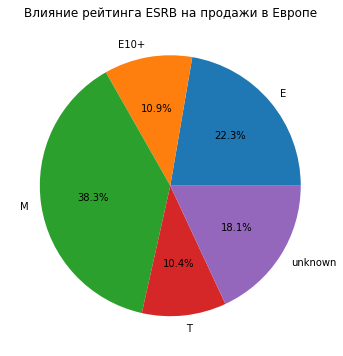

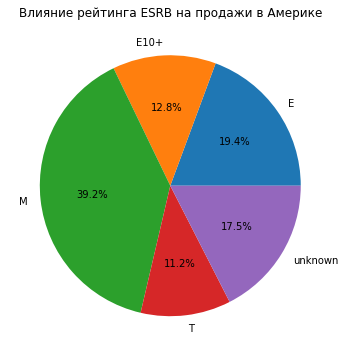

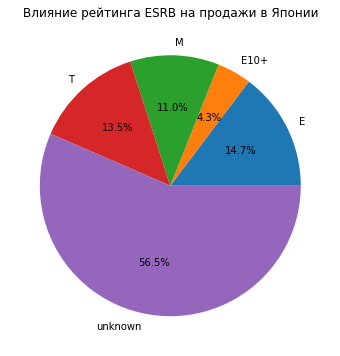

In [47]:
groupby = data_rating.groupby('rating')

rating = groupby['eu_sales'].sum().reset_index()
plt.figure(figsize=(6, 6))
plt.pie(rating['eu_sales'], labels=rating['rating'], autopct='%1.1f%%')
plt.title('Влияние рейтинга ESRB на продажи в Европе')
plt.show()

rating = groupby['na_sales'].sum().reset_index()
plt.figure(figsize=(6, 6))
plt.pie(rating['na_sales'], labels=rating['rating'], autopct='%1.1f%%')
plt.title('Влияние рейтинга ESRB на продажи в Америке')
plt.show()

rating = groupby['jp_sales'].sum().reset_index()
plt.figure(figsize=(6, 6))
plt.pie(rating['jp_sales'], labels=rating['rating'], autopct='%1.1f%%')
plt.title('Влияние рейтинга ESRB на продажи в Японии')
plt.show()

Рейтинг ESRB влияет на продажи в Америке и Европе. Игры выбираются в основном рейтинга "М" и "Е". Также игр без рейтинга мало: в Америке таких 17.5%, в Европе 18.1%.  А вот влияние рейтинга в Японии незначительно, т.к. у 56.5% рейтинг не проставлен.

#### Проверка гипотез

Сформулируем нулевую гипотезу: средние пользовательские рейтинги платформ XOne и PC одинаковые.
<br> Альтернативная - платформы XOne и PC имеют разные средние пользовательские рейтинги.
<br> У нас даны две независимые выборки, значит будем  проверять двухстороннюю гипотезу о равенстве средних двух генеральных совокупностей. Уровень стат. значимости 0.05 считается компромиссом между чувствительностью и специфичностью статистического тестирования.

In [49]:
# Отфильтруем только платформу XOne и PC.
xone_users = data_user[data_user['platform'] == 'XOne']
pc_users = data_user[data_user['platform'] == 'PC']

In [50]:
# Сравниваем средние рейтинги для XOne и PC.
xone_mean = xone_users['user_score']
pc_mean = pc_users['user_score']
alpha = 0.05 # Устанавливаем ур. ст. значимости.

# Используем t-тест для сравнения средних
results = st.ttest_ind(xone_mean, pc_mean)

print(f'p-value: {results.pvalue}')
if results.pvalue < alpha:
    print("Нулевую гипотезу отвергаем")
else:
    print("Принимаем нулевую гипотезу")

p-value: 0.5535080500643661
,Принимаем нулевую гипотезу


Полученное значение меньше заданного уровня значимости, поэтому нулевую гипотезу можем принять. Есть основания полагать, что средние пользовательские рейтинги платформ XOne и PC одинаковые.
Подкрепляем результат гипотезы сравнением среднего значения этих платформ, который показывает небольшую разницу в показателях - 0.09.

In [52]:
xone_mean = xone_users[xone_users['platform'] == 'XOne']['user_score'].mean()
pc_mean = pc_users[pc_users['platform'] == 'PC']['user_score'].mean()

print(f"Среднее значение оценки пользователей для Xbox One: {xone_mean}")
print(f"Среднее значение оценки пользователей для PC: {pc_mean}")

Среднее значение оценки пользователей для Xbox One: 6.521428571428572
,Среднее значение оценки пользователей для PC: 6.4286407766990274


   <br>  Сформулируем нулевую гипотезу: средние пользовательские рейтинги жанров Action и Sports одинаковые.
    <br> В статистике альтернативная гипотеза представляет собой предположение, которое мы проверяем против нулевой гипотезы. Альтернативная гипотеза: средние пользовательские рейтинги жанров Action и Sports разные.
<br> Это две независимые выборки, значит будем  проверять двухстороннюю гипотезу о равенстве средних двух генеральных совокупностей. Уровень стат. значимости 0.05 считается компромиссом между чувствительностью и специфичностью статистического тестирования.

In [53]:
# Отбираем рейтинги для жанров Action и Sports
action_ratings = data_user[data_user['genre'] == 'Action']['user_score']
sports_ratings = data_user[data_user['genre'] == 'Sports']['user_score']

alpha = 0.05 # Установим уровень ст. значимости.

# Выполним t-тест.
results = st.ttest_ind(action_ratings, sports_ratings)

# Выводим результаты.
print(f'p-value: {results.pvalue}')


if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Принимаем нулевую гипотезу')


p-value: 4.8045233804629176e-26
,Отвергаем нулевую гипотезу


Полученное значение меньше заданного уровня значимости, поэтому нулевую гипотезу отвергаем. Есть основания полагать, что средние пользовательские рейтинги жанров Action и Sports разные.
<br> Подкрепляем результат гипотезы сравнением среднего значения этих жанров. (Максимальная оценка пользователя - 10 баллов). 

In [56]:
action_mean = data_user[data_user['genre'] == 'Action']['user_score'].mean()
sports_mean = data_user[data_user['genre'] == 'Sports']['user_score'].mean()

print(f"Среднее значение оценки пользователей для жанра Action: {action_mean}")
print(f"Среднее значение оценки пользователей для жанра Sports: {sports_mean}")

Среднее значение оценки пользователей для жанра Action: 6.825047801147227
,Среднее значение оценки пользователей для жанра Sports: 5.455670103092784


#### Общий вывод на основе полученных данных

Проанализировав данные интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры  можно сделать выводы, что индустрия компьютерных игр стремительно меняется. 
    Предоставленные данные охватывают период 1980-2016 гг. с содержанием информации о проданных компьютерных играх с оценками пользователей и экспертов, их жанр и платформа.
    
<br> **Обработка данных**
<br> В данных была удалена одна продублированная строка, две строки без названия игры и жанра, 269 строк с отсутствием даты выпуска. В столбец с рейтингом ESRB на места пропуска была поставлена заглушка значением 'unknown'. Пропуски столбцов с оценками критиков и пользователей заполнены значением -1, то есть нерелевантным значением оценки, но цифрой, чтобы дальше анализировать данные. В таблицу добавлена информация с общими продажами в разрезе игр Америки, Европы, Японии и других стран. 
    
<br>**Исследовательский анализ** <br>
Подсчет выпуска игр по годам показал, что самый "богатый" год 2008. Самые прибыльные платформы PS2, X360, PS3, Wii, DS и PS. Для прогноза на 2017 год использовали период 2012-2016 гг. В данном периоде выделяем перспективные платформы: PS4, X360, XOne, Wii, WiiU и PS3. Диаграммы размаха показали, что выделяются два жанра по доходности - Action и Shooter. 
    
<br> **Портрет пользователя для каждого региона**<br>
    - В Европе пользователь предпочитает играть в PlayStation и XBox жанра Action и Shooter. Игры выбираются c рейтингом "M" (для лиц старше 17 лет). <br>
    - В Америке игрок выбирает приставку Xbox жанра Action тоже "М" рейтинга ESRB.<br>
    - В Японии выбирают РПГ на Nintendo консоли без определения рейтинга ESRB.
    
<br>**Проверка гипотез**
<br> Проверка гипотезы и расчет среднего значения показали, что средние пользовательские рейтинги платформ XOne и PC одинаковые. 
<br> Проверка гипотезы и расчет среднего значения показали, что средние пользовательские рейтинги жанров Action и Sports отличаются. 
    
<br>**Итог**
<br> При анализе игр с разных сторон мы рекомендуем применять рекламные компании для игроков в Европе. Что касается жанров - Action показал более высокую среднюю оценку пользователей, в этом жанре выпускается больше игр, чем в других. Игры с рейтингом ESRB - "М" продаются больше остальных. Рекомендуются платформы PlayStation и XBox. Также при планировании рекламных компаний не стоит брать в расчет только оценки критиков и пользователей, только вкупе с другими показателями, т.к. они слабо влияют на продажи. 